In [1]:
import numpy as np

### Ejercicio 1 (0.5 puntos)
Utilizar el conjunto de datos "dataset.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Partición de datos externa (0.25 puntos)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42). 

In [2]:
dataset = np.load("dataset.npy")
# separate x and y
x_data = dataset[:,:-1]
y_data = dataset[:,-1]

In [3]:
from sklearn.model_selection import train_test_split

# test partition using hold-out strategy
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data
    , y_data
    , test_size=0.2
    , random_state=42)

#### 1.b) Estandarización de los datos (0.5 puntos)
Utilizar el método StandardScaler para estandarizar tanto los datos de train como los datos de test

In [4]:
from sklearn.preprocessing import StandardScaler

# fit standard scaler using training data
standard_scaler = StandardScaler()
standard_scaler_trained = standard_scaler.fit(x_training_data)

#training data standardization
x_training_data = standard_scaler_trained.transform(x_training_data)

#test data standardization
x_test_data = standard_scaler_trained.transform(x_test_data)

### Ejercicio 2 (2.5 puntos)
Se requieren los resultados del ejercicio anterior

#### 1.a) Selección de atributos mediante tests estadísticos (1.5 puntos)
Sobre el conjunto de entrenamiento:
 - Determinar si las características siguen una distribución normal de media 0 y desviación estándar 1. Fijar 'alpha=0.01'. 
 - Aplicar el test estadístico correspondiente para comparar la media o la mediana de los atributos según proceda. Fijar 'alpha=0.01'.
 - Eliminar aquellas características que no sean discriminatorias. 
 - Dibujar un diagrama de caja y bigotes que muestre los valores que toman los 5 primeros atributos en función de la clase.

Sobre el conjunto de test:
 - Eliminar las características pertinentes. (Este proceso debe estar automatizado, no hacerse de forma manual)

In [5]:
from scipy.stats import kstest

# check if attributes follow a normal distribution
alpha = 0.01 #trust level = 99%
column_follows_normal_distribution = np.zeros(x_training_data.shape[1])

for i in range(x_training_data.shape[1]):
    _, value = kstest(x_training_data[:,i], 'norm')

    if value <= alpha:
        # not normal distribution
        column_follows_normal_distribution[i] = 0
    else:
        # normal distribution
        column_follows_normal_distribution[i] = 1

In [6]:
from scipy.stats import ttest_ind, mannwhitneyu

# check if attributes are discriminative
class_is_true = x_training_data[y_training_data == 1]
class_is_false = x_training_data[y_training_data == 0]

column_is_discriminative = np.zeros(x_training_data.shape[1])

for i in range(x_training_data.shape[1]):
    if column_follows_normal_distribution[i] == 0: # not normal distribution
        _, value = mannwhitneyu(class_is_true[:,i], class_is_false[:,i])
    else:# normal distribution
        _, value = ttest_ind(class_is_true[:,i], class_is_false[:,i])

    if value <= alpha:
        # is discriminative
        column_is_discriminative[i] = 1
    else:
        # not discriminative
        column_is_discriminative[i] = 0

not_discriminative_columns = np.where(column_is_discriminative == 0)[0]
print("Características no discriminatorias: ", not_discriminative_columns)
print("Caracteristicas discriminatorias: ", np.where(column_is_discriminative == 1)[0])

#delete not discriminative columns
x_training_data = np.delete(x_training_data, not_discriminative_columns, axis = 1)
x_test_data = np.delete(x_test_data, not_discriminative_columns, axis = 1)

Características no discriminatorias:  [ 7  8 12 22]
Caracteristicas discriminatorias:  [ 0  1  2  3  4  5  6  9 10 11 13 14 15 16 17 18 19 20 21]


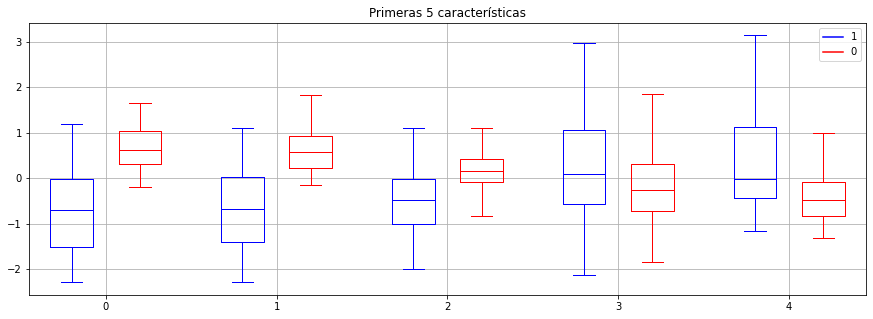

In [7]:
# boxplot chart first 5 features
from matplotlib import pyplot as plt

features_to_show = 5

plt.figure(figsize = (15,5))
plt.boxplot(class_is_true[:,:features_to_show]
    , positions=np.array(range(features_to_show))*2.0-0.4
    , sym=''
    , boxprops={"color" : "blue"}
    , capprops={"color" : "blue"}
    , whiskerprops={"color" : "blue"}
    , medianprops={"color" : "blue"})

plt.boxplot(class_is_false[:,:features_to_show]
    , positions=np.array(range(features_to_show))*2.0+0.4
    , sym=''
    , boxprops={"color" : "red"}
    , capprops={"color" : "red"}
    , whiskerprops={"color" : "red"}
    , medianprops={"color" : "red"})

plt.plot([], c="blue", label="1")
plt.plot([], c="red", label="0")
plt.legend()

plt.xticks(range(0, features_to_show*2, 2), range(features_to_show))

plt.grid(True)
plt.title(f"Primeras {features_to_show} características")
plt.show()

#### 1.b) Análisis de correlación (1 punto)
Sobre el conjunto de entrenamiento: 
 - Representar la matriz de correlación para observar mediante un mapa de color el nivel de correlación entre atributos. 
 - Eliminar aquellas variables que estén correladas por encima de un umbral 'th=0.9'

Sobre el conjunto de test:
 - Eliminar las características pertinentes. (Este proceso debe estar automatizado, no hacerse de forma manual)

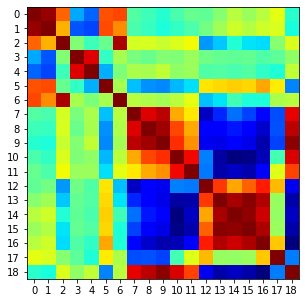

Características correlacionadas:  [ 1  6  9 13 14 15 16 18]
Caracteristicas no correlacionadas:  [ 0  2  3  4  5  7  8 10 11 12 17]


In [8]:
# correlation analysis
correlations = np.corrcoef(x_training_data.transpose())

plt.figure(figsize = (25,5))
plt.yticks(range(x_training_data.shape[1]))
plt.xticks(range(x_training_data.shape[1]))
plt.imshow(correlations, cmap="jet")
plt.show()

correlation_threshold = 0.9

correlated_indexes = abs(correlations) > correlation_threshold

upper_matrix = np.triu(correlated_indexes, 1)

row, col = np.where(upper_matrix==True)
correlated_indexes = np.unique(col)

print("Características correlacionadas: ", correlated_indexes)
print("Caracteristicas no correlacionadas: ", np.setdiff1d(range(x_training_data.shape[1]), correlated_indexes))

#delete correlated columns
x_training_data = np.delete(x_training_data, correlated_indexes, axis = 1)
x_test_data = np.delete(x_test_data, correlated_indexes, axis = 1)

### Ejercicio 3 (2 puntos)
Se requieren los resultados del ejercicio anterior

#### 3.a) Comparación de modelos de clasifición y optimización de hiperparámetros (1 punto)
Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión logística, random forest y perceptrón multicapa. (Fijar en todos una semilla en 42). La comparación debe realizarse en términos de exactitud (accuracy) proporcionando resultados de media +- desviación estándar.

In [9]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn import preprocessing

# set algorithms and hyperparameters
algorithms = {'LR': LogisticRegression(random_state=42
                    , solver="saga"
                    , penalty="l1"
                    , max_iter=1000
                ),
              'RF': RandomForestClassifier(random_state=42
                    , n_estimators=100
                    , max_depth=None
                    , criterion="entropy"
                ),
              'MLP': MLPClassifier(random_state=42
                    , max_iter=2000
                    , hidden_layer_sizes=[10,5]
                    , activation="relu"
                    , solver="adam"
                    , batch_size="auto"
                    , learning_rate="adaptive"
                    , learning_rate_init=0.01
                )}

# get accuracy for each algorithm
for algorithm_name, algorithm in algorithms.items():
    cross_val_predict(algorithm, x_training_data, y_training_data, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    results = cross_val_score(algorithm, x_training_data, y_training_data, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    print(algorithm_name, "accuracy:   %0.4f +/- %0.4f" % (results.mean(), results.std()))

LR accuracy:   0.9055 +/- 0.0272
RF accuracy:   0.9630 +/- 0.0302
MLP accuracy:   0.9507 +/- 0.0276


#### 3.b) Evaluación de los modelos sobre el conjunto de test (1 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento y evaluar su rendimiento sobre el conjunto de test.
- Mostrar en UNA ÚNICA figura la comparación de las curvas ROC obtenidas para cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LR, RF y MLP 

In [10]:
# models training and prediction
y_predicted_data = []
trained_models = []
for algorithm_name, algorithm in algorithms.items():
    model = algorithm.fit(x_training_data, y_training_data)
    y_predicted_data.append(model.predict(x_test_data))
    trained_models.append(model)

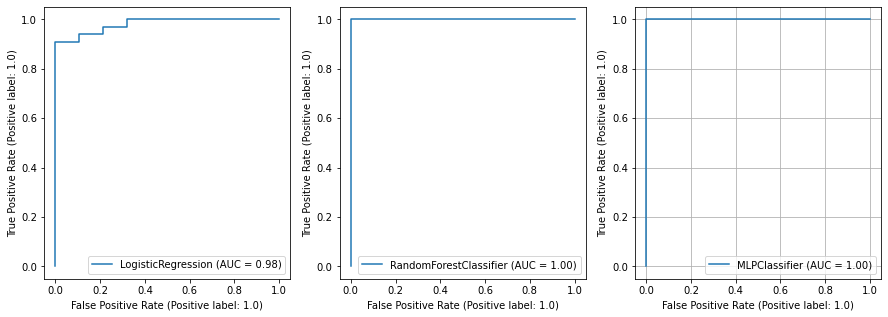

In [11]:
# ROC plot
fig, axes = plt.subplots(1,3, figsize=(15, 5))
for i, ax in enumerate(axes): 
    metrics.plot_roc_curve(trained_models[i], x_test_data, y_test_data, response_method="predict_proba", ax=ax)
    plt.grid()

plt.show()

In [12]:
from tabulate import tabulate

# model results
headers = ["Métrica/Modelo"]

for algorithm_name, algorithm in algorithms.items():
    headers.append(algorithm_name)

P, S, FS, ACC, AUC = [["Precisión"], ["Sensibilidad"], ["F1-Score"], ["Accuracy"], ["AUC"]]

for i in range(len(y_predicted_data)):
    P.append(np.round(metrics.precision_score(y_test_data, y_predicted_data[i]), 4))
    S.append(np.round(metrics.recall_score(y_test_data, y_predicted_data[i]), 4))
    FS.append(np.round(metrics.f1_score(y_test_data, y_predicted_data[i]), 4))
    ACC.append(np.round(metrics.accuracy_score(y_test_data, y_predicted_data[i]), 4))
    AUC.append(np.round(metrics.roc_auc_score(y_test_data, y_predicted_data[i]), 4))

table_data = [tuple(P), tuple(S), tuple(FS), tuple(ACC), tuple(AUC)]
print(tabulate(table_data, headers=headers))

Métrica/Modelo        LR    RF     MLP
----------------  ------  ----  ------
Precisión         1          1  0.9429
Sensibilidad      0.9091     1  1
F1-Score          0.9524     1  0.9706
Accuracy          0.9508     1  0.9672
AUC               0.9545     1  0.9643


### Ejercicio 4 (2 puntos)
Utilizar el conjunto de datos "fish_dataset" para resolver el ejercicio

#### 4.a) Procesado de imagen previo a la extracción de características (1 punto)
Crear una función llamada "cropping_function" donde: 
- Los inputs sean la imagen RGB de un pez y su máscara correspondiente.
- El output sea el crop de la bounding box de la imagen original orientada en el eje horizontal.

Para ello, se pide:
- Calcular la orientación del objeto a caracterizar.
- Hacer una conversión siguiendo la siguiente fórmula:
 * angle = (orientation*90)/(math.pi/2), utiliza "import math"
   -  Si 'angle' es mayor que 0, la orientación será igual a 90-angle
   -  Si no, la orientación será igual a -(90+angle)
- Aplicar una transformación geométrica de rotación para orientar horizontalmente el objeto de interés.
- Hacer un crop de la boundingbox de la imagen original RGB, que será el output de la función

#### 4.b) Extracción de características de textura basadas en el descriptor Local Binary Pattern (1 punto)
Crear un bucle for en el que:
 - Se lean las imágenes RGB y sus máscaras
 - Se extraiga el crop de la imagen RGB horizontal llamando a la función creada en el apartado anterior
 - Se calcule la matriz de coocurrencias (GLCM)
 - Se calculen las 6 propiedades más importantes de la GLCM

El resultado final debe ser una tabla comparativa donde las filas serán las 6 propiedades de la GLCM y las columnas, cada una de las muestras analizadas

### Ejercicio 5 (2.5 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, MSE, RMSE, MAPE y R2 aplicando los regresores OLS y KNN en un dataset de regresión (a elegir). Nota: no pueden utilizarse datasets creados de manera artificial ni tampoco datasets de la librería de scikit-learn.  

Se debe llevar a cabo: 
- Descripción del dataset y exploración de los datos
- Tratamiento de outliers y valores perdidos (si los hay)
- Partición externa de datos
- Selección de atributos (cualquier método es válido)
- Estandarización de los datos
- Validación cruzada interna para optimizar los hiperparámetros de los algoritmos (si procede)
- Modelado
- Predicción y evaluación sobre el conjunto de test (resultados cuantitativos y cualitativos)
- Breve discusión de los resultados obtenidos. 


## Descripción del Dataset - Concrete Compressive Strength Data Set

El dataset a utilizar fue tomado de [Kaggle](https://www.kaggle.com/maajdl/yeh-concret-data) y contiene muestras sobre la resistencia a la compresion del concreto (1030 instancias) en relación con sus componentes y edad.

**Atributos (8 en total)**

- Cement - kg in a m3 mixture
- Blast Furnace Slag - kg in a m3 mixture
- Fly Ash - kg in a m3 mixture
- Water - kg in a m3 mixture
- Superplasticizer - kg in a m3 mixture
- Coarse Aggregate - kg in a m3 mixture
- Fine Aggregate - kg in a m3 mixture
- Age - in days

**Variable de salida o clase**

- Concrete compressive strength - MPa (Megapascals)

In [13]:
import pandas as pd

# read dataset using pandas
concrede_dataframe = pd.read_csv("concrete_data.csv",)

# show dataframe sample of 20 instances
display(concrede_dataframe.sample(20))

# describe dataframe attributes
display(concrede_dataframe.describe())

# show attributes information
display(concrede_dataframe.info())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
691,212.0,141.3,0.0,203.5,0.0,973.4,750.0,3,6.81
252,250.0,0.0,95.7,187.4,5.5,956.9,861.2,56,38.33
934,184.0,86.0,190.0,213.0,6.0,923.0,623.0,28,22.93
732,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,7,9.01
982,312.7,0.0,0.0,178.1,8.0,999.7,822.2,28,25.10
501,491.0,26.0,123.0,210.0,3.9,882.0,699.0,3,25.61
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7,38.00
585,290.2,193.5,0.0,185.7,0.0,998.2,704.3,28,33.04
898,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.86
970,314.0,145.3,113.2,178.9,8.0,869.1,690.2,28,46.23


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

**Tratamiento de outliers y valores perdidos**

En la fuente del dataset, se menciona que no hay valores perdidos pero para estar seguros se realizará la comprobación.

In [14]:
# check nan values
nan_count = np.isnan(concrede_dataframe).sum()
print("Cantidad de valores perdidos:")
print(nan_count)

Cantidad de valores perdidos:
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


Q1: 13.072133038228767 Q2: 22.756032743532316 IQR: 9.68389970530355
Límite inferior:  -15.97956607768188
Límite superior:  51.80773185944297
Indice de outliers en el extremo inferior:  (array([  2,   3,   4,   6,  12,  17,  19,  20,  23,  24,  25,  26,  27,
        30,  31,  32,  33,  34,  35,  39,  41,  42,  43,  47,  50,  51,
        56,  58,  60,  61,  63,  64,  65,  66,  76,  79,  99, 102, 122,
       145, 168, 171, 224, 225, 226, 227, 228, 499, 501, 502, 503, 603,
       604, 609, 610, 615, 616, 619, 620, 621, 622, 755, 756, 762, 768,
       769, 791, 792, 794, 795, 797, 798, 813, 814, 820, 823]),)
Indice de outliers en el extremo superior:  (array([], dtype=int64),)


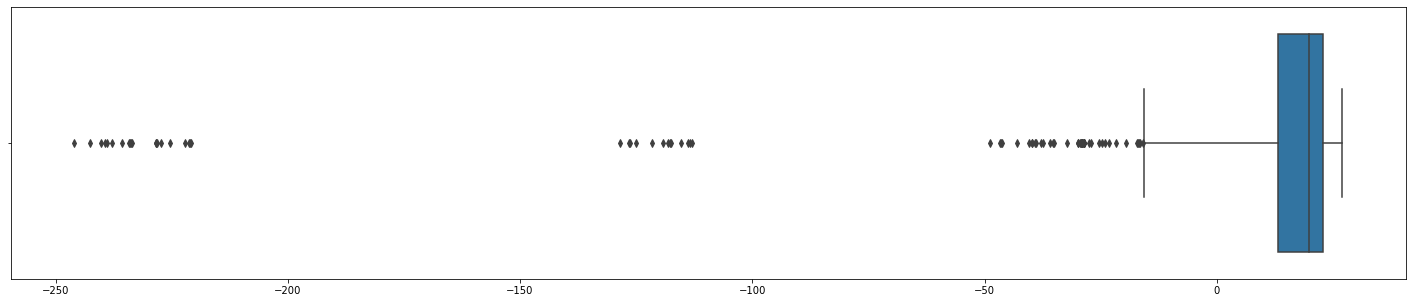

x(954, 8): [[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 266.   114.     0.  ...  932.   670.    90. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
y(954,): [79.99 61.89 47.03 36.45 45.85 39.29 38.07 28.02 42.33 47.81 52.91 39.36
 40.56 28.24  8.06 37.43 38.6  30.08 37.72 42.23 50.46 41.54 35.08 15.05
 26.26 32.82 33.12 49.19 14.59 14.64  9.13 33.02  9.87 30.28 40.86 71.99
 34.4  28.8  33.4  36.3  29.   37.8  33.4  28.1  33.4  25.2  41.1  35.3
 28.3  28.6  35.3  24.4  35.3  39.3  40.6  35.3  24.1  46.2  42.8  49.2
 46.8  45.7  55.6  49.2  34.9  49.2  33.4  54.1  55.9  49.8  47.1  55.9
 38.   55.9  56.1  59.09 22.9  35.1  61.09 59.8  60.29 61.8  56.7  68.3
 60.29 50.7  56.4  60.29 55.5  68.5  71.3  74.7  52.2  71.3  67.7  71.3
 66.   74.5  71.3  49.9  63.4  64.9  64.3  64.9  60.2  72.3  64.3  55.2
 58.8  64.3  66.1  73.7  77.3

In [15]:
from sklearn.covariance import EllipticEnvelope
from scipy import stats
import seaborn as sns

# convert to ndarray and separate x and y
dataset = concrede_dataframe.to_numpy(copy=True)

x_data = dataset[:,:-1]
y_data = dataset[:,-1]

data_columns = concrede_dataframe.columns

# detect outliers using EllipticEnvelope
outlier_method = EllipticEnvelope(random_state=42).fit(x_data)
scores_pred = outlier_method.decision_function(x_data)

# first quartile
Q1 = stats.scoreatpercentile(scores_pred, 25)
# third quertile
Q3 = stats.scoreatpercentile(scores_pred, 75)
# interquartile range
IQR = Q3 - Q1

print("Q1:", Q1, "Q2:", Q3, "IQR:", IQR)

lower_bound = Q1 - 3*IQR
upper_bound = Q3 + 3*IQR

print('Límite inferior: ', lower_bound)
print('Límite superior: ', upper_bound)

# get indexes of outliers
lower_bound_outliers_index = np.where(scores_pred<lower_bound)
upper_bound_outliers_index = np.where(scores_pred>upper_bound)

print('Indice de outliers en el extremo inferior: ', lower_bound_outliers_index)
print('Indice de outliers en el extremo superior: ', upper_bound_outliers_index)

# boxplot chart with EllipticEnvelope scores
plt.figure(figsize = (25,5))
ax = sns.boxplot(x = scores_pred, whis=3.0)
plt.show()

# remove rows with outliers from original x
x_data = np.delete(x_data, lower_bound_outliers_index[0], axis=0)
y_data = np.delete(y_data, lower_bound_outliers_index[0], axis=0)
x_data = np.delete(x_data, upper_bound_outliers_index[0], axis=0)
y_data = np.delete(y_data, upper_bound_outliers_index[0], axis=0)

# x and y output
print(f"x{x_data.shape}:", x_data)
print(f"y{y_data.shape}:", y_data)

**Partición externa tipo hold-out**

In [16]:
# test partition using hold-out strategy
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data
    , y_data
    , test_size=0.2
    , random_state=42)

**Selección de atributos mediante eliminación por baja varianza (20%)**

In [17]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold(0.2)
variance_threshold_trained = variance_threshold.fit(x_training_data)

# remove columns on training and test data
x_training_data = variance_threshold_trained.transform(x_training_data)
x_test_data = variance_threshold_trained.transform(x_test_data)

print(f"x-training-data{x_training_data.shape}")
print(f"x_test_data{x_training_data.shape}")

x-training-data(763, 8)
x_test_data(763, 8)


No se eliminaron atributos luego de aplicar la validación por baja varianza.

**Selección de atributos usando F-test e información mutua**

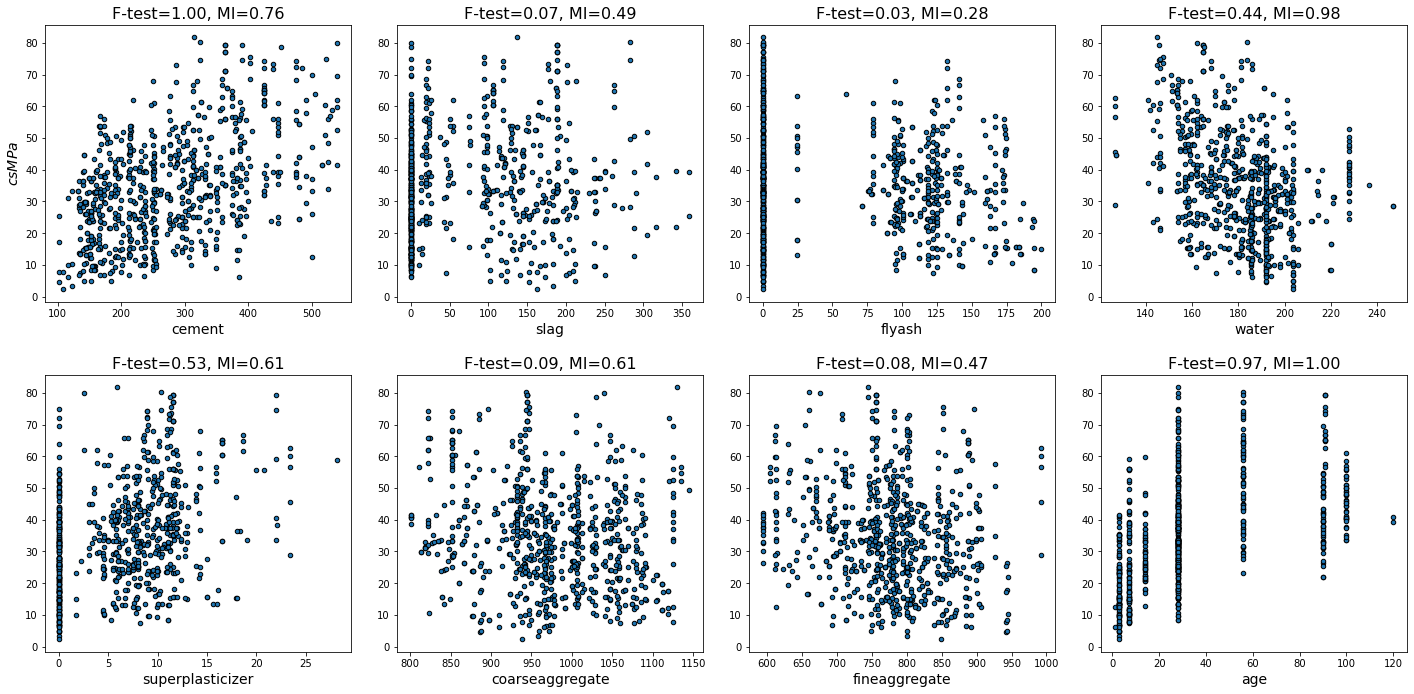

In [18]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# f-test evaluation
f_test, _ = f_regression(x_training_data, y_training_data)
f_test /= np.max(f_test)

# mutual info
mutual_info = mutual_info_regression(x_training_data, y_training_data, random_state=42)
mutual_info /= np.max(mutual_info)

# chart data distribution
plt.figure(figsize=(20, 10))
i = 0
for r in range(2):
    for c in range(4):

        plt.subplot(2, 4, i+1)
        plt.scatter(x_training_data[:, i], y_training_data, edgecolor='black', s=20)
        plt.xlabel(data_columns[i], fontsize=14)
        if i == 0:
            plt.ylabel("$csMPa$", fontsize=14)
        plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mutual_info[i]), fontsize=16)
        i+=1

plt.tight_layout(pad=2.0)
plt.show()

Luego de realizar este análisis, se decide eliminar los atributos flyash del dataset ya que las metrica FTest = 0.03 y la MI = 0.28 nos dice que no es lo suficientemente discriminatoria con respecto a la clase

In [19]:
# remove flyash attribue
x_training_data = np.delete(x_training_data, 2, axis = 1)
x_test_data = np.delete(x_test_data, 2, axis = 1)

**Estandarización de los datos**

In [20]:
# fit standard scaler using training data
standard_scaler = StandardScaler()
standard_scaler_trained = standard_scaler.fit(x_training_data)

#training data standardization
x_training_data = standard_scaler_trained.transform(x_training_data)

#test data standardization
x_test_data = standard_scaler_trained.transform(x_test_data)

**Validación cruzada y optimización de parametros**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# set algorithms and hyperparameters
algorithms = {'OLS': LinearRegression(),
              'KNN': KNeighborsRegressor(n_neighbors=10
                , weights='distance'
                , metric='euclidean'
                , algorithm='auto'
                )}

# evaluate each algorithm
for algorithm_name, algorithm in algorithms.items():
    results = cross_val_score(algorithm, x_training_data, y_training_data, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
    print(algorithm_name, "MAE:   %0.4f +/- %0.4f" % (-results.mean(), results.std()))


OLS MAE:   6.5881 +/- 0.4334
KNN MAE:   5.0530 +/- 0.2156


**Modelado y evaluación**

In [22]:
# evaluation metrics
evaluation_metrics = {
  'MAE':  metrics.mean_absolute_error,
  'MSE':  lambda y, y_pred:
          metrics.mean_squared_error(y, y_pred),
  'RMSE': lambda y, y_pred:
          np.sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

# models training and prediction
y_predicted_data = []
trained_models = []
for algorithm_name, algorithm in algorithms.items():
    model = algorithm.fit(x_training_data, y_training_data)
    y_predicted_data.append(model.predict(x_test_data))
    trained_models.append(model)

headers = ["Métrica/Modelo"]

for algorithm_name, algorithm in algorithms.items():
    headers.append(algorithm_name)

MAE, MSE, RMSE, MAPE, R2 = [["MAE"], ["MSE"], ["RMSE"], ["MAPE"], ["R2"]]

for i in range(len(y_predicted_data)):
    MAE.append(np.round(evaluation_metrics['MAE'](y_test_data, y_predicted_data[i]), 4))
    MSE.append(np.round(evaluation_metrics['MSE'](y_test_data, y_predicted_data[i]), 4))
    RMSE.append(np.round(evaluation_metrics['RMSE'](y_test_data, y_predicted_data[i]), 4))
    MAPE.append(np.round(evaluation_metrics['MAPE'](y_test_data, y_predicted_data[i]), 4))
    R2.append(np.round(evaluation_metrics['R2'](y_test_data, y_predicted_data[i]), 4))

table_data = [tuple(MAE), tuple(MSE), tuple(RMSE), tuple(MAPE), tuple(R2)]
print(tabulate(table_data, headers=headers))

Métrica/Modelo        OLS      KNN
----------------  -------  -------
MAE                5.8442   4.9907
MSE               57.8367  49.5423
RMSE               7.605    7.0386
MAPE              21.6049  17.6355
R2                 0.7979   0.8269


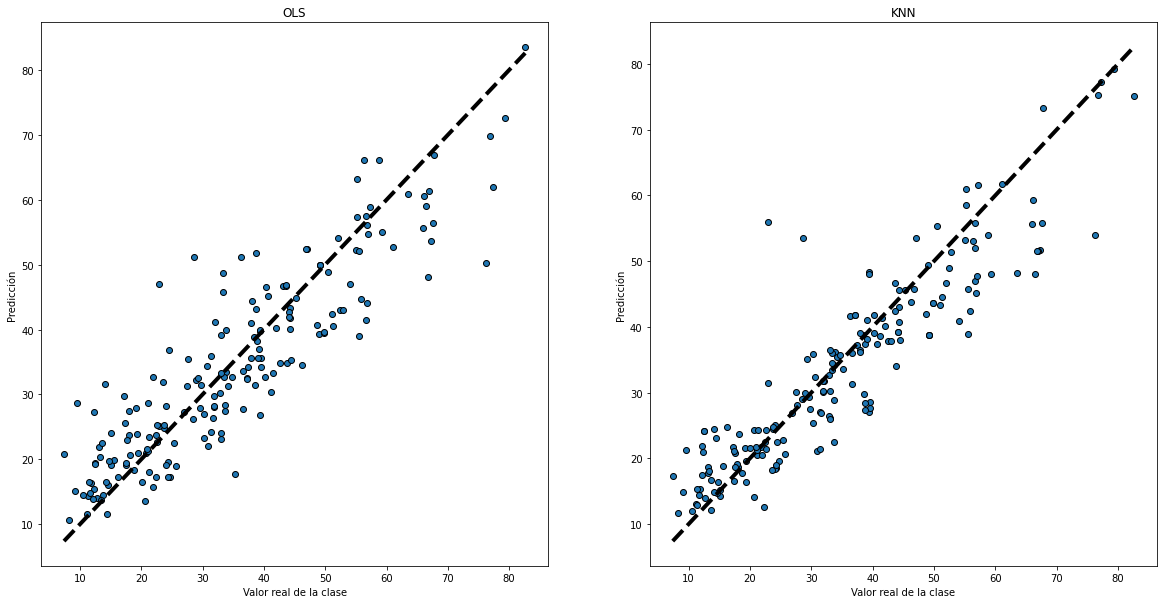

In [23]:
# evaluation chart
plt.figure(figsize=(20, 10))
i = 0
for algorithm_name, algorithm in algorithms.items():
        plt.subplot(1, 2, i+1)
        plt.scatter(y_test_data, y_predicted_data[i], edgecolors=(0, 0, 0))
        plt.plot([y_test_data.min(), y_test_data.max()],
                [y_test_data.min(), y_test_data.max()], 'k--', lw=4)
        plt.xlabel('Valor real de la clase')
        plt.ylabel('Predicción')
        plt.title(algorithm_name)
        i+=1
plt.show()

Luego de la evaluación se puede decir que el modelo **KNN** es el que mejor se ajusta al problema de calcular la resistencia a la compresión del concreto segun sus materiales y edad. Adicionalmente el error absoluto medio (MAE) obtenido para **KNN** en la evaluación es casi identico al obtenido en la fase de modelado con los datos de entrenamiento.